# ЧТО Я ДЕЛАЮ?
Из скаченных файлов историй торгов с сайта EXMO.ME, объединяю эти истории торгов в один общий датасет со всей историей за весь наблюдаемый период торговли. С этим большим датасетом продолжаю работать. 

Затем из большого общего датасета создаю малые датасеты за каждый месяц и уже с этими малыми датасетами будет произведена аналитика,тем самым получив отчёт за месяц.

Информация отчёта:
- временной период торговли
- общее число сделок
- общее число BUY сделок
- общее число SELL сделок
- Число торговых пар в которых велась торговля
- Список торговых пар в которых велась торговля
- Число валют в которых велась торговля
- Список валют в которых велась торговля
- ДАТАФРЕЙМ: валютная пара, общее число сделок, число BUY сделок, число SELL сделок 

Не сделано:
- визуализация данных BUY\SELL
- число сделок в день. из них buy sell
- визуализация числа сделок в день



In [48]:
# Импортирую библиотеки, загружаю и создаю датасеты, с которыми в дальнейшем будем работать

import pandas as pd
import numpy as np
import datetime
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


%matplotlib inline



df_first = pd.read_csv('trade-history-2021-11-07.csv')
df_middle = pd.read_csv('trade-history-2022-10-10.csv')
df_last = pd.read_csv('trade-history-2023-11-01.csv')


def big_dataset(dataframe_first, dataframe_last):
    ### Concatinations dataframes
    return pd.concat([dataframe_first, dataframe_last], ignore_index=True).drop_duplicates()

big_df_1 = pd.concat([df_middle, df_first], ignore_index=True).drop_duplicates()
big_df = pd.concat([df_last, big_df_1], ignore_index=True).drop_duplicates()

# сортировка по годам
df_2021 = big_df[big_df['Дата/время'].str.contains("2021")]
df_2022 = big_df[big_df['Дата/время'].str.contains("2022")]
df_2023 = big_df[big_df['Дата/время'].str.contains("2023")]

# сортировка по месяцам
df_jan_2021 = df_2021[df_2021['Дата/время'].str.contains(".01.2021")]
df_feb_2021 = df_2021[df_2021['Дата/время'].str.contains(".02.2021")]
df_mar_2021 = df_2021[df_2021['Дата/время'].str.contains(".03.2021")]
df_apr_2021 = df_2021[df_2021['Дата/время'].str.contains(".04.2021")]
df_may_2021 = df_2021[df_2021['Дата/время'].str.contains(".05.2021")]
df_jun_2021 = df_2021[df_2021['Дата/время'].str.contains(".06.2021")]
df_jul_2021 = df_2021[df_2021['Дата/время'].str.contains(".07.2021")]
df_avg_2021 = df_2021[df_2021['Дата/время'].str.contains(".08.2021")]
df_sep_2021 = df_2021[df_2021['Дата/время'].str.contains(".09.2021")]
df_oct_2021 = df_2021[df_2021['Дата/время'].str.contains(".10.2021")]
df_nov_2021 = df_2021[df_2021['Дата/время'].str.contains(".11.2021")]
df_dec_2021 = df_2021[df_2021['Дата/время'].str.contains(".12.2021")]

df_jan_2022 = df_2022[df_2022['Дата/время'].str.contains(".01.2022")]
df_feb_2022 = df_2022[df_2022['Дата/время'].str.contains(".02.2022")]
df_mar_2022 = df_2022[df_2022['Дата/время'].str.contains(".03.2022")]
df_apr_2022 = df_2022[df_2022['Дата/время'].str.contains(".04.2022")]
df_may_2022 = df_2022[df_2022['Дата/время'].str.contains(".05.2022")]
df_jun_2022 = df_2022[df_2022['Дата/время'].str.contains(".06.2022")]
df_jul_2022 = df_2022[df_2022['Дата/время'].str.contains(".07.2022")]
df_avg_2022 = df_2022[df_2022['Дата/время'].str.contains(".08.2022")]
df_sep_2022 = df_2022[df_2022['Дата/время'].str.contains(".09.2022")]
df_oct_2022 = df_2022[df_2022['Дата/время'].str.contains(".10.2022")]
df_nov_2022 = df_2022[df_2022['Дата/время'].str.contains(".11.2022")]
df_dec_2022 = df_2022[df_2022['Дата/время'].str.contains(".12.2022")]

df_jan_2023 = df_2023[df_2023['Дата/время'].str.contains(".01.2023")]
df_feb_2023 = df_2023[df_2023['Дата/время'].str.contains(".02.2023")]
df_mar_2023 = df_2023[df_2023['Дата/время'].str.contains(".03.2023")]
df_apr_2023 = df_2023[df_2023['Дата/время'].str.contains(".04.2023")]
df_may_2023 = df_2023[df_2023['Дата/время'].str.contains(".05.2023")]
df_jun_2023 = df_2023[df_2023['Дата/время'].str.contains(".06.2023")]
df_jul_2023 = df_2023[df_2023['Дата/время'].str.contains(".07.2023")]
df_avg_2023 = df_2023[df_2023['Дата/время'].str.contains(".08.2023")]
df_sep_2023 = df_2023[df_2023['Дата/время'].str.contains(".09.2023")]
df_oct_2023 = df_2023[df_2023['Дата/время'].str.contains(".10.2023")]
df_nov_2023 = df_2021[df_2021['Дата/время'].str.contains(".11.2023")]
df_dec_2023 = df_2023[df_2023['Дата/время'].str.contains(".12.2023")]

Добавляю функции

In [45]:
# Считаем временой период торговли
def time_period(dataframe):
    all_dates = dataframe['Дата/время'].tolist()
    start = all_dates[-1]
    end = all_dates[0]
    start_dtm = datetime.datetime.strptime(start, '%d.%m.%Y %H:%M')
    end_dtm = datetime.datetime.strptime(end, '%d.%m.%Y %H:%M')
    print(f'\nПроизведён анализ временного периода торговли: с {start} по {end}'
          f'\nчто составляет {end_dtm - start_dtm} \n')

def time_period_1(dataframe):
    all_dates = dataframe['Дата/время'].tolist()
    start = all_dates[-1]
    end = all_dates[0]
    start_dtm = datetime.datetime.strptime(start, '%d.%m.%Y %H:%M')
    end_dtm = datetime.datetime.strptime(end, '%d.%m.%Y %H:%M')
    return start_dtm, end_dtm

# Считаем число сделок и сколько из них buy сколько sell во всём датасете
def buy_sell_count(dataframe):
    print(f"Общее число сделок: {len(dataframe)}, из них \n"
        f"BUY: {len(dataframe[dataframe['Тип'] == 'buy'])} \n"
        f"SELL: {len(dataframe[dataframe['Тип'] == 'sell'])} \n")
    
# список всех валютных пар 
def all_pairs_list(dataframe):
    return dataframe['Валютная пара'].unique().tolist()

# Список валют которыми велась торговля
def currents(pair_list):
    currents_list = []
    for el in pair_list:
        curs = el.split('_')
        for el in curs:
            currents_list.append(el)
    return set(currents_list)

# число сделок в каждой валютной паре
def all_pairs_count(dataframe):
    return dataframe['Валютная пара'].value_counts()

# выводим информацию по числу торговых пар
def all_pairs_info(dataframe):
    cur_pairs = dataframe['Валютная пара'].unique().tolist()
    curs = currents(all_pairs_list(dataframe))

    print(f'Число торговых пар в которых велась торговля: {len(cur_pairs)} \n' 
          f'Список торговых пар в которых велась торговля: {cur_pairs}  \n\n'
          f'Число валют в которых велась торговля: {len(curs)} \n'
          f'Список валют в которых велась торговля: {curs}  \n\n')

# Датасет по валютной паре 
def df_curr_pair(dataframe, current_pair):
    current = str(current_pair.upper())
    return dataframe.loc[(dataframe['Валютная пара'] == current)]

# Список датасетов по каждой валютной паре
def dataframe_pairs_list(dataframe):
    all_pairs_list = dataframe['Валютная пара'].unique().tolist()	
    dataframe_all_pairs_list = []
    for el in all_pairs_list:
        dataframe_all_pairs_list.append(df_curr_pair(dataframe, el))
    return dataframe_all_pairs_list

# Первичный сводный датасет c по КОНКРЕТНОЙ ВАЛЮТНОЙ ПАРЕ:
# - названием валютной пары
# - общее число сделок
# - число BUY сделок
# - число SELL сделок

def buy_sell_all_count(solodataframe):
    cur_pair = solodataframe['Валютная пара'].unique()[0]
    all_count = len(solodataframe)
    buy_count = 0
    sell_count = 0

    a = solodataframe['Тип'].value_counts()

    if len(a) == 2:
        buy_count = len(solodataframe[solodataframe['Тип'] == 'buy'])
        sell_count = len(solodataframe[solodataframe['Тип'] == 'sell'])

    else:
        if str(solodataframe['Тип']) == 'buy':
            buy_count = len(solodataframe)
        else:
            sell_count = len(solodataframe)

    return(cur_pair, all_count, buy_count, sell_count)

# Создаёт датасет с 4 мя столбцами на основе всех валютных пар,
# сортирует по общему числу сделок 

# столбцы:
# - названием валютной пары
# - общее число сделок
# - число BUY сделок
# - число SELL сделок

def cur_buy_sell_all_df(dataframe):
    pair_list = []
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []

    for el in dataframe_pairs_list(dataframe):	

        solodata = buy_sell_all_count(el)

        pair_list.append(solodata[0])
        trade_counts_list.append(solodata[1])
        buy_count_list.append(solodata[2])
        sell_count_list.append(solodata[3])

        cur_all_buy_sell_df = pd.DataFrame({'cur_pair' : pair_list,
                          'trd_count' : trade_counts_list,
                          'sell_count': sell_count_list,
                          'buy_count': buy_count_list
                         },
                           columns=['cur_pair','trd_count', 'sell_count', 'buy_count'])
    return cur_all_buy_sell_df.sort_values(by='trd_count', ascending=False)

def months(big_df):
    df_all_dates = big_df

    # сортировка по годам
    df_2021 = df_all_dates[df_all_dates['Дата/время'].str.contains("2021")]
    df_2022 = df_all_dates[df_all_dates['Дата/время'].str.contains("2022")]
    df_2023 = df_all_dates[df_all_dates['Дата/время'].str.contains("2023")]

    # сортировка по месяцам
    df_jan_2021 = df_2021[df_2021['Дата/время'].str.contains(".01.2021")]
    df_feb_2021 = df_2021[df_2021['Дата/время'].str.contains(".02.2021")]
    df_mar_2021 = df_2021[df_2021['Дата/время'].str.contains(".03.2021")]
    df_apr_2021 = df_2021[df_2021['Дата/время'].str.contains(".04.2021")]
    df_may_2021 = df_2021[df_2021['Дата/время'].str.contains(".05.2021")]
    df_jun_2021 = df_2021[df_2021['Дата/время'].str.contains(".06.2021")]
    df_jul_2021 = df_2021[df_2021['Дата/время'].str.contains(".07.2021")]
    df_avg_2021 = df_2021[df_2021['Дата/время'].str.contains(".08.2021")]
    df_sep_2021 = df_2021[df_2021['Дата/время'].str.contains(".09.2021")]
    df_oct_2021 = df_2021[df_2021['Дата/время'].str.contains(".10.2021")]
    df_nov_2021 = df_2021[df_2021['Дата/время'].str.contains(".11.2021")]
    df_dec_2021 = df_2021[df_2021['Дата/время'].str.contains(".12.2021")]

    df_jan_2022 = df_2022[df_2022['Дата/время'].str.contains(".01.2022")]
    df_feb_2022 = df_2022[df_2022['Дата/время'].str.contains(".02.2022")]
    df_mar_2022 = df_2022[df_2022['Дата/время'].str.contains(".03.2022")]
    df_apr_2022 = df_2022[df_2022['Дата/время'].str.contains(".04.2022")]
    df_may_2022 = df_2022[df_2022['Дата/время'].str.contains(".05.2022")]
    df_jun_2022 = df_2022[df_2022['Дата/время'].str.contains(".06.2022")]
    df_jul_2022 = df_2022[df_2022['Дата/время'].str.contains(".07.2022")]
    df_avg_2022 = df_2022[df_2022['Дата/время'].str.contains(".08.2022")]
    df_sep_2022 = df_2022[df_2022['Дата/время'].str.contains(".09.2022")]
    df_oct_2022 = df_2022[df_2022['Дата/время'].str.contains(".10.2022")]
    df_nov_2022 = df_2022[df_2022['Дата/время'].str.contains(".11.2022")]
    df_dec_2022 = df_2022[df_2022['Дата/время'].str.contains(".12.2022")]

    df_jan_2023 = df_2023[df_2023['Дата/время'].str.contains(".01.2023")]
    df_feb_2023 = df_2023[df_2023['Дата/время'].str.contains(".02.2023")]
    df_mar_2023 = df_2023[df_2023['Дата/время'].str.contains(".03.2023")]
    df_apr_2023 = df_2023[df_2023['Дата/время'].str.contains(".04.2023")]
    df_may_2023 = df_2023[df_2023['Дата/время'].str.contains(".05.2023")]
    df_jun_2023 = df_2023[df_2023['Дата/время'].str.contains(".06.2023")]
    df_jul_2023 = df_2023[df_2023['Дата/время'].str.contains(".07.2023")]
    df_avg_2023 = df_2023[df_2023['Дата/время'].str.contains(".08.2023")]
    df_sep_2023 = df_2023[df_2023['Дата/время'].str.contains(".09.2023")]
    df_oct_2023 = df_2023[df_2023['Дата/время'].str.contains(".10.2023")]
    df_nov_2023 = df_2021[df_2021['Дата/время'].str.contains(".11.2023")]
    df_dec_2023 = df_2023[df_2023['Дата/время'].str.contains(".12.2023")]


    print(f'\nСделки за 2021 год. Общее количество: {len(df_2021)}, BUY: {len(df_2021[df_2021["Тип"] == "buy"])}, SELL: {len(df_2021[df_2021["Тип"] == "sell"])}'
      f'\nЯнварь 2021: {len(df_jan_2021)}, BUY: {len(df_jan_2021[df_jan_2021["Тип"] == "buy"])}, SELL: {len(df_jan_2021[df_jan_2021["Тип"] == "sell"])}'
      f'\nФевраль 2021: {len(df_feb_2021)}, BUY: {len(df_feb_2021[df_feb_2021["Тип"] == "buy"])}, SELL: {len(df_feb_2021[df_feb_2021["Тип"] == "sell"])}'
      f'\nМарт 2021: {len(df_mar_2021)}, BUY: {len(df_mar_2021[df_mar_2021["Тип"] == "buy"])}, SELL: {len(df_mar_2021[df_mar_2021["Тип"] == "sell"])}'
      f'\nАпрель 2021: {len(df_apr_2021)}, BUY: {len(df_apr_2021[df_apr_2021["Тип"] == "buy"])}, SELL: {len(df_apr_2021[df_apr_2021["Тип"] == "sell"])}'
      f'\nМай 2021: {len(df_may_2021)}, BUY: {len(df_may_2021[df_may_2021["Тип"] == "buy"])}, SELL: {len(df_may_2021[df_may_2021["Тип"] == "sell"])}'
      f'\nИюнь 2021: {len(df_jun_2021)}, BUY: {len(df_jun_2021[df_jun_2021["Тип"] == "buy"])}, SELL: {len(df_jun_2021[df_jun_2021["Тип"] == "sell"])}'
      f'\nИюль 2021: {len(df_jun_2021)}, BUY: {len(df_jul_2021[df_jul_2021["Тип"] == "buy"])}, SELL: {len(df_jul_2021[df_jul_2021["Тип"] == "sell"])}'
      f'\nАвгуст 2021: {len(df_avg_2021)}, BUY: {len(df_avg_2021[df_avg_2021["Тип"] == "buy"])}, SELL: {len(df_avg_2021[df_avg_2021["Тип"] == "sell"])}'
      f'\nСентябрь 2021: {len(df_sep_2021)}, BUY: {len(df_sep_2021[df_sep_2021["Тип"] == "buy"])}, SELL: {len(df_sep_2021[df_sep_2021["Тип"] == "sell"])}'
      f'\nОктябрь 2021: {len(df_oct_2021)}, BUY: {len(df_oct_2021[df_oct_2021["Тип"] == "buy"])}, SELL: {len(df_oct_2021[df_oct_2021["Тип"] == "sell"])}'
      f'\nНоябрь 2021: {len(df_nov_2021)}, BUY: {len(df_nov_2021[df_nov_2021["Тип"] == "buy"])}, SELL: {len(df_nov_2021[df_nov_2021["Тип"] == "sell"])}'
      f'\nДекабрь 2021: {len(df_dec_2021)}, BUY: {len(df_dec_2021[df_dec_2021["Тип"] == "buy"])}, SELL: {len(df_dec_2021[df_dec_2021["Тип"] == "sell"])}')

    print(f'\nСделки за 2022 год. Общее количество: {len(df_2022)}, BUY: {len(df_2022[df_2022["Тип"] == "buy"])}, SELL: {len(df_2022[df_2022["Тип"] == "sell"])}'
      f'\nЯнварь 2022: {len(df_jan_2022)}, BUY: {len(df_jan_2022[df_jan_2022["Тип"] == "buy"])}, SELL: {len(df_jan_2022[df_jan_2022["Тип"] == "sell"])}'
      f'\nФевраль 2022: {len(df_feb_2022)}, BUY: {len(df_feb_2022[df_feb_2022["Тип"] == "buy"])}, SELL: {len(df_feb_2022[df_feb_2022["Тип"] == "sell"])}'
      f'\nМарт 2022: {len(df_mar_2022)}, BUY: {len(df_mar_2022[df_mar_2022["Тип"] == "buy"])}, SELL: {len(df_mar_2022[df_mar_2022["Тип"] == "sell"])}'
      f'\nАпрель 2022: {len(df_apr_2022)}, BUY: {len(df_apr_2022[df_apr_2022["Тип"] == "buy"])}, SELL: {len(df_apr_2022[df_apr_2022["Тип"] == "sell"])}'
      f'\nМай 2022: {len(df_may_2022)}, BUY: {len(df_may_2022[df_may_2022["Тип"] == "buy"])}, SELL: {len(df_may_2022[df_may_2022["Тип"] == "sell"])}'
      f'\nИюнь 2022: {len(df_jun_2022)}, BUY: {len(df_jun_2022[df_jun_2022["Тип"] == "buy"])}, SELL: {len(df_jun_2022[df_jun_2022["Тип"] == "sell"])}'
      f'\nИюль 2022: {len(df_jun_2022)}, BUY: {len(df_jul_2022[df_jul_2022["Тип"] == "buy"])}, SELL: {len(df_jul_2022[df_jul_2022["Тип"] == "sell"])}'
      f'\nАвгуст 2022: {len(df_avg_2022)}, BUY: {len(df_avg_2022[df_avg_2022["Тип"] == "buy"])}, SELL: {len(df_avg_2022[df_avg_2022["Тип"] == "sell"])}'
      f'\nСентябрь 2022: {len(df_sep_2022)}, BUY: {len(df_sep_2022[df_sep_2022["Тип"] == "buy"])}, SELL: {len(df_sep_2022[df_sep_2022["Тип"] == "sell"])}'
      f'\nОктябрь 2022: {len(df_oct_2022)}, BUY: {len(df_oct_2022[df_oct_2022["Тип"] == "buy"])}, SELL: {len(df_oct_2022[df_oct_2022["Тип"] == "sell"])}'
      f'\nНоябрь 2022: {len(df_nov_2022)}, BUY: {len(df_nov_2022[df_nov_2022["Тип"] == "buy"])}, SELL: {len(df_nov_2022[df_nov_2022["Тип"] == "sell"])}'
      f'\nДекабрь 2022: {len(df_dec_2022)}, BUY: {len(df_dec_2022[df_dec_2022["Тип"] == "buy"])}, SELL: {len(df_dec_2022[df_dec_2022["Тип"] == "sell"])}')

    print(f'\nСделки за 2023 год. Общее количество: {len(df_2023)}, BUY: {len(df_2023[df_2023["Тип"] == "buy"])}, SELL: {len(df_2023[df_2023["Тип"] == "sell"])}'
      f'\nЯнварь 2023: {len(df_jan_2023)}, BUY: {len(df_jan_2023[df_jan_2023["Тип"] == "buy"])}, SELL: {len(df_jan_2023[df_jan_2023["Тип"] == "sell"])}'
      f'\nФевраль 2023: {len(df_feb_2023)}, BUY: {len(df_feb_2023[df_feb_2023["Тип"] == "buy"])}, SELL: {len(df_feb_2023[df_feb_2023["Тип"] == "sell"])}'
      f'\nМарт 2023: {len(df_mar_2023)}, BUY: {len(df_mar_2023[df_mar_2023["Тип"] == "buy"])}, SELL: {len(df_mar_2023[df_mar_2023["Тип"] == "sell"])}'
      f'\nАпрель 2023: {len(df_apr_2023)}, BUY: {len(df_apr_2023[df_apr_2023["Тип"] == "buy"])}, SELL: {len(df_apr_2023[df_apr_2023["Тип"] == "sell"])}'
      f'\nМай 2023: {len(df_may_2023)}, BUY: {len(df_may_2023[df_may_2023["Тип"] == "buy"])}, SELL: {len(df_may_2023[df_may_2023["Тип"] == "sell"])}'
      f'\nИюнь 2023: {len(df_jun_2023)}, BUY: {len(df_jun_2023[df_jun_2023["Тип"] == "buy"])}, SELL: {len(df_jun_2023[df_jun_2023["Тип"] == "sell"])}'
      f'\nИюль 2023: {len(df_jun_2023)}, BUY: {len(df_jul_2023[df_jul_2023["Тип"] == "buy"])}, SELL: {len(df_jul_2023[df_jul_2023["Тип"] == "sell"])}'
      f'\nАвгуст 2023: {len(df_avg_2023)}, BUY: {len(df_avg_2023[df_avg_2023["Тип"] == "buy"])}, SELL: {len(df_avg_2023[df_avg_2023["Тип"] == "sell"])}'
      f'\nСентябрь 2023: {len(df_sep_2023)}, BUY: {len(df_sep_2023[df_sep_2023["Тип"] == "buy"])}, SELL: {len(df_sep_2023[df_sep_2023["Тип"] == "sell"])}'
      f'\nОктябрь 2023: {len(df_oct_2023)}, BUY: {len(df_oct_2023[df_oct_2023["Тип"] == "buy"])}, SELL: {len(df_oct_2023[df_oct_2023["Тип"] == "sell"])}'
      f'\nНоябрь 2023: {len(df_nov_2023)}, BUY: {len(df_nov_2023[df_nov_2023["Тип"] == "buy"])}, SELL: {len(df_nov_2023[df_nov_2023["Тип"] == "sell"])}'
      f'\nДекабрь 2023: {len(df_dec_2023)}, BUY: {len(df_dec_2023[df_dec_2023["Тип"] == "buy"])}, SELL: {len(df_dec_2023[df_dec_2023["Тип"] == "sell"])}')

    
# Число сделок в день
def per_day(dataframe):
    new_vals = []
    vals = dataframe['Дата/время'].values
    for el in vals:
        numb = el[0:2]
        new_vals.append(numb)
    dataframe['days'].value_counts()
    return dataframe['days'].value_counts()

# Визуализация данных по Buy и Sell
def visual_buy_sell(dataframe):
    dataframe['Тип'].value_counts().plot.bar()
    plt.show()

# Число сделок в день, сортировка по дате    
from collections import Counter

def per_day_date(dataframe):
    new_vals = []
    vals = dataframe['Дата/время'].values
    for el in vals:
        numb = el[0:2]
        new_vals.append(numb)
    count = Counter(new_vals)

    return dict(sorted(count.items()))

# Создаёт датасет с 5 столбцами на основе всех валютных пар, в которых велась торговля
# сортирует по дате

# столбцы:
# - число дня месяца
# - общее число сделок
# - число BUY сделок
# - число SELL сделок
# - валютные пары в которых совершались сделки

def per_day_datesorted(dataframe):
    day = []
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []
    cur_list = []
    
    vals = dataframe['Дата/время'].values
    
    for el in vals:
        numb = el[0:10]
        day.append(numb)
    
    days = list(set(day))
    
    for el in days:
        trd_count = len(dataframe[dataframe['Дата/время'].str.contains(el)])
        trade_counts_list.append(trd_count)
        
        b = dataframe[dataframe['Дата/время'].str.contains(el)]
        a = b['Тип'].value_counts()
        c = b['Валютная пара'].unique()
        cur_list.append(c)

        if len(a) == 2:
            buy_count = len(b[b['Тип'] == 'buy'])
            buy_count_list.append(buy_count)
            sell_count = len(b[b['Тип'] == 'sell'])
            sell_count_list.append(sell_count)
        else:
            if str(b['Тип']) == 'buy':
                buy_count = len(b)
                buy_count_list.append(buy_count)
                sell_count_list.append(0)
            else:
                sell_count = len(b)
                buy_count_list.append(0)
                sell_count_list.append(sell_count)
                
    per_day_df = pd.DataFrame({'date' : days,
                          'trd_cnt' : trade_counts_list,
                          'sell_cnt': sell_count_list,
                          'buy_cnt': buy_count_list,
                          'cur_prs': cur_list
                         },
                           columns=['date','trd_cnt', 'sell_cnt', 'buy_cnt', 'cur_prs'])
    return per_day_df.sort_values(by='date', ascending=True)

# столбцы:
# - число дня месяца
# - общее число сделок
# - число BUY сделок
# - число SELL сделок

def per_day_datesorted_trdcnt(dataframe):
    day = []
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []

    
    vals = dataframe['Дата/время'].values
    
    for el in vals:
        numb = el[0:10]
        day.append(numb)
    
    days = list(set(day))
    
    for el in days:
        trd_count = len(dataframe[dataframe['Дата/время'].str.contains(el)])
        trade_counts_list.append(trd_count)
        
        b = dataframe[dataframe['Дата/время'].str.contains(el)]
        a = b['Тип'].value_counts()


        if len(a) == 2:
            buy_count = len(b[b['Тип'] == 'buy'])
            buy_count_list.append(buy_count)
            sell_count = len(b[b['Тип'] == 'sell'])
            sell_count_list.append(sell_count)
        else:
            if str(b['Тип']) == 'buy':
                buy_count = len(b)
                buy_count_list.append(buy_count)
                sell_count_list.append(0)
            else:
                sell_count = len(b)
                buy_count_list.append(0)
                sell_count_list.append(sell_count)
                
    per_day_df = pd.DataFrame({'date' : days,
                          'trd_cnt' : trade_counts_list,
                          'sell_cnt': sell_count_list,
                          'buy_cnt': buy_count_list
                         },
                           columns=['date','trd_cnt', 'sell_cnt', 'buy_cnt'])
    return per_day_df.sort_values(by='date', ascending=True)

# Создаёт один обобщающий датасет с максимумом информации
def max_pair_info(dataframe):
    
    pair_list = all_pairs_list(dataframe)
    
    dataframe_pairs_list = []
    for el in pair_list:
        dataframe_pairs_list.append(df_curr_pair(dataframe, el))
        
    pair_list = all_pairs_list(dataframe)
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []
    all_cur_value = []
    buy_cur_value = []
    sell_cur_value = []
    delta_cur_value = []
    min_price = []
    max_price = []
    x_max_min = []
    value = []
    buy_value = []
    sell_value = []
    delta_value = []
    first_date = []
    last_date = []
    delta_date = []



    for el in dataframe_pairs_list:
        trade_counts_list.append(len(el))
        all_cur_value.append(el['Количество'].sum())
        value.append(el['Сумма'].sum())
        
        a = el['Тип'].value_counts()
    
        if len(a) == 2:
            buy_count_list.append(a[0])
            sell_count_list.append(a[1])  
            buy_cur_value.append(el[el['Тип'] == 'buy']['Количество'].sum())
            sell_cur_value.append(el[el['Тип'] == 'sell']['Количество'].sum())
            delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
            min_price.append(el[el['Тип'] == 'buy']['Цена'].min())
            max_price.append(el[el['Тип'] == 'sell']['Цена'].max())
            x_max_min.append(el[el['Тип'] == 'sell']['Цена'].max()/el[el['Тип'] == 'buy']['Цена'].min())
            buy_value.append(el[el['Тип'] == 'buy']['Сумма'].sum())
            sell_value.append(el[el['Тип'] == 'sell']['Сумма'].sum())
            delta_value.append(el[el['Тип'] == 'sell']['Сумма'].sum() - el[el['Тип'] == 'buy']['Сумма'].sum())
            first_date.append(time_period_1(el)[0])
            last_date.append(time_period_1(el)[1])
            delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
        
        else:
            if str(el['Тип']) == 'buy':
                buy_count_list.append(len(el))
                sell_count_list.append(0)
                buy_cur_value.append(el['Количество'].sum())
                sell_cur_value.append(0)
                delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
                min_price.append(el['Цена'].min())
                max_price.append(el['Цена'].max())
                x_max_min.append(el['Цена'].max()/el['Цена'].min())
                buy_value.append(el['Сумма'].sum())
                sell_value.append(0)
                delta_value.append(0 - el['Сумма'].sum())
                first_date.append(time_period_1(el)[0])
                last_date.append(time_period_1(el)[1])
                delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
            else:
                buy_count_list.append(0)
                sell_count_list.append(len(el))
                buy_cur_value.append(0)
                sell_cur_value.append(el['Количество'].sum())
                delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
                min_price.append(el['Цена'].min())
                max_price.append(el['Цена'].max())
                x_max_min.append(el['Цена'].max()/el['Цена'].min())
                buy_value.append(0)
                sell_value.append(el['Сумма'].sum())
                delta_value.append(el['Сумма'].sum() - 0)
                first_date.append(time_period_1(el)[0])
                last_date.append(time_period_1(el)[1])
                delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
                
    finish_df = pd.DataFrame({'cur_pair' : pair_list,
                          'trd_count' : trade_counts_list,
                          'sell_count': sell_count_list,
                          'buy_count': buy_count_list,
                          'all_cur_value': all_cur_value,
                          'buy_cur_value': buy_cur_value,
                          'sell_cur_value': sell_cur_value,
                          'delta_cur_value': delta_cur_value,
                          'min_price': min_price,
                          'max_price': max_price,
                          'x_kf':x_max_min,
                          'value': value,
                          'buy_value': buy_value,
                          'sell_value': sell_value,
                          'delta_value': delta_value,
                          'first_date':  first_date, 
                          'last_date':  last_date,
                          'time_period': delta_date
                         },
                           columns=['cur_pair',
                                    'trd_count', 
                                    'sell_count', 
                                    'buy_count', 
                                    'all_cur_value', 
                                    'buy_cur_value', 
                                    'sell_cur_value',
                                    'delta_cur_value',
                                    'min_price', 
                                    'max_price', 
                                    'x_kf',
                                    'value',
                                    'buy_value', 
                                    'sell_value', 
                                    'delta_value',
                                    'first_date', 
                                    'last_date', 
                                    'time_period'])
    return finish_df

# функция визуализации данных по числу сделок в день. 
def trd_count_to_month_visual_1(df):

    # Преобразование столбца 'Дата сделки' в тип данных datetime
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

    return df.plot(x='date',y='trd_cnt',style='k--')

def trd_count_to_month_visual_2(df):

    # Преобразование столбца 'Дата сделки' в тип данных datetime
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
    df.set_index('date', inplace=True)

    return df.plot(y='trd_cnt', kind='bar')

In [39]:
def month_analys(dataframe):
    time_period(dataframe)
    buy_sell_count(dataframe)
    visual_buy_sell(dataframe)
    all_pairs_info(dataframe)
    df_month = per_day_datesorted(dataframe)
    print("ТАБЛИЦА С ТОРГОВЫМИ ПАРАМИ И ЧИСЛОМ СДЕЛОК BUY, SELL, ОТСОРТИРОВАНАЯ ПО ОБЩЕМУ ЧИСЛУ СДЕЛОК \n\n",
          cur_buy_sell_all_df(dataframe), "\n")
    print("ТАБЛИЦА С ЧИСЛОМ СДЕЛОК В ДЕНЬ, И ВАЛЮТНЫЕ ПАРЫ ГДЕ СОВЕРШАЛИСЬ СДЕЛКИ, ОТСОРТИРОВАННАЯ ПО ДАТЕ \n\n",
          df_month, "\n")
    print("ВИЗУАЛИЗАЦИЯ ЧИСЛА СДЕЛОК В ДЕНЬ\n\n")
    trd_count_to_month_visual_1(df_month)
    trd_count_to_month_visual_2(df_month)


Произведён анализ временного периода торговли: с 01.04.2023 03:42 по 30.04.2023 23:58
что составляет 29 days, 20:16:00 

Общее число сделок: 239, из них 
BUY: 115 
SELL: 124 



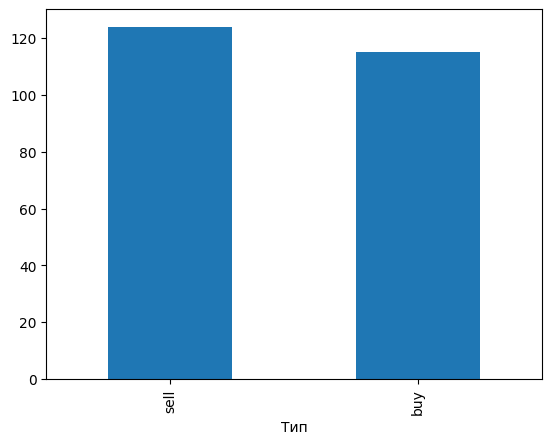

Число торговых пар в которых велась торговля: 15 
Список торговых пар в которых велась торговля: ['EXM_ETH', 'EXM_BTC', 'DAI_RUB', 'DOGE_BTC', 'XTZ_RUB', 'DOGE_RUB', 'WXT_USDT', 'DOGE_USDT', 'XRP_ETH', 'XLM_RUB', 'PRQ_USDT', 'ROOBEE_USDT', 'DAI_ETH', 'SHIB_RUB', 'TON_BTC']  

Число валют в которых велась торговля: 15 
Список валют в которых велась торговля: {'DOGE', 'XLM', 'XTZ', 'TON', 'WXT', 'USDT', 'BTC', 'ROOBEE', 'DAI', 'EXM', 'XRP', 'PRQ', 'ETH', 'RUB', 'SHIB'}  


ТАБЛИЦА С ТОРГОВЫМИ ПАРАМИ И ЧИСЛОМ СДЕЛОК BUY, SELL, ОТСОРТИРОВАНАЯ ПО ОБЩЕМУ ЧИСЛУ СДЕЛОК 

        cur_pair  trd_count  sell_count  buy_count
1       EXM_BTC         63          31         32
3      DOGE_BTC         60          35         25
5      DOGE_RUB         29          20          9
0       EXM_ETH         28          10         18
4       XTZ_RUB         19           7         12
8       XRP_ETH          9           2          7
2       DAI_RUB          8           6          2
7     DOGE_USDT          8   

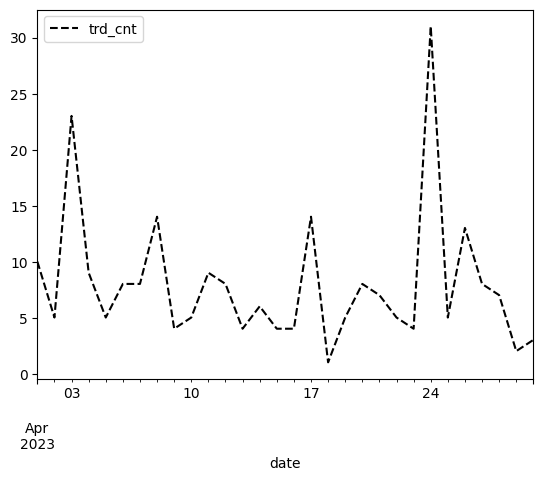

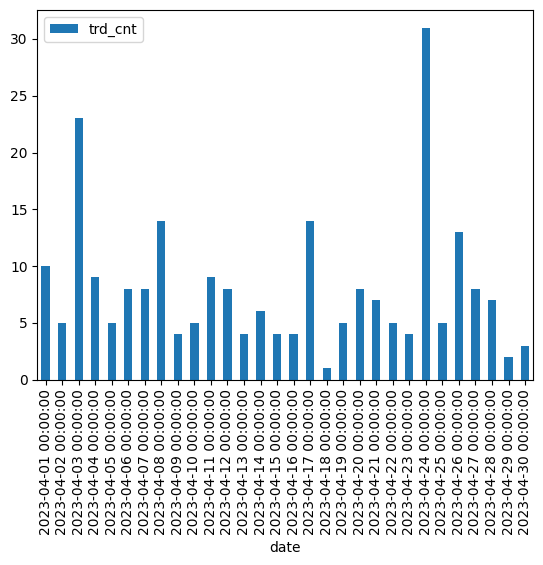

In [50]:
month_analys(df_apr_2023)


In [61]:
months(big_df)


Сделки за 2021 год. Общее количество: 11933, BUY: 6138, SELL: 5795
Январь 2021: 0, BUY: 0, SELL: 0
Февраль 2021: 0, BUY: 0, SELL: 0
Март 2021: 0, BUY: 0, SELL: 0
Апрель 2021: 1257, BUY: 610, SELL: 647
Май 2021: 1217, BUY: 708, SELL: 509
Июнь 2021: 2345, BUY: 1063, SELL: 1282
Июль 2021: 2345, BUY: 744, SELL: 539
Август 2021: 1391, BUY: 620, SELL: 771
Сентябрь 2021: 945, BUY: 486, SELL: 459
Октябрь 2021: 1148, BUY: 678, SELL: 470
Ноябрь 2021: 1144, BUY: 589, SELL: 555
Декабрь 2021: 1203, BUY: 640, SELL: 563

Сделки за 2022 год. Общее количество: 6590, BUY: 3750, SELL: 2840
Январь 2022: 1181, BUY: 740, SELL: 441
Февраль 2022: 794, BUY: 463, SELL: 331
Март 2022: 705, BUY: 315, SELL: 390
Апрель 2022: 661, BUY: 366, SELL: 295
Май 2022: 914, BUY: 596, SELL: 318
Июнь 2022: 375, BUY: 200, SELL: 175
Июль 2022: 375, BUY: 120, SELL: 68
Август 2022: 295, BUY: 125, SELL: 170
Сентябрь 2022: 126, BUY: 58, SELL: 68
Октябрь 2022: 349, BUY: 173, SELL: 176
Ноябрь 2022: 654, BUY: 397, SELL: 257
Декабрь 20

In [108]:
c = df_curr_pair(df_oct_2023, "EXM_ETH")
per_day_datesorted_trdcnt(c)

,date,trd_cnt,sell_cnt,buy_cnt
6,01.10.2023,4,3,1
4,02.10.2023,2,2,0
7,03.10.2023,5,1,4
11,04.10.2023,3,3,0
17,05.10.2023,1,1,0
16,06.10.2023,2,2,0
23,07.10.2023,2,2,0
5,08.10.2023,3,2,1
1,09.10.2023,4,1,3
8,10.10.2023,2,2,0


In [90]:
# Создаёт датасет с 5 столбцами на основе всех валютных пар, в которых велась торговля
# сортирует по дате

# столбцы:
# - число дня месяца
# - общее число сделок
# - число BUY сделок
# - число SELL сделок
# - валютные пары в которых совершались сделки

def per_day_datesorted(dataframe):
    day = []
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []
    cur_list = []
    
    vals = dataframe['Дата/время'].values
    
    for el in vals:
        numb = el[0:10]
        day.append(numb)
    
    days = list(set(day))
    
    for el in days:
        trd_count = len(dataframe[dataframe['Дата/время'].str.contains(el)])
        trade_counts_list.append(trd_count)
        
        b = dataframe[dataframe['Дата/время'].str.contains(el)]
        a = b['Тип'].value_counts()
        c = b['Валютная пара'].unique()
        cur_list.append(c)

        if len(a) == 2:
            buy_count = len(b[b['Тип'] == 'buy'])
            buy_count_list.append(buy_count)
            sell_count = len(b[b['Тип'] == 'sell'])
            sell_count_list.append(sell_count)
        else:
            if str(b['Тип']) == 'buy':
                buy_count = len(b)
                buy_count_list.append(buy_count)
                sell_count_list.append(0)
            else:
                sell_count = len(b)
                buy_count_list.append(0)
                sell_count_list.append(sell_count)
                
    per_day_df = pd.DataFrame({'date' : days,
                          'trd_count' : trade_counts_list,
                          'sell_count': sell_count_list,
                          'buy_count': buy_count_list,
                          'cur_pairs': cur_list
                         },
                           columns=['date','trd_count', 'sell_count', 'buy_count', 'cur_pairs'])
    return per_day_df.sort_values(by='date', ascending=True)

    

        
    
    

In [91]:
per_day_datesorted(df_oct_2023)


,date,trd_count,sell_count,buy_count,cur_pair
6,01.10.2023,11,9,2,"[EXM_ETH, EXM_BTC]"
4,02.10.2023,3,3,0,"[EXM_ETH, USDT_KZT]"
7,03.10.2023,8,4,4,"[XRP_ETH, EXM_ETH, DAI_RUB]"
12,04.10.2023,8,1,7,"[DOGE_BTC, EXM_ETH, EXM_BTC]"
20,05.10.2023,2,1,1,"[EXM_ETH, XRP_ETH]"
18,06.10.2023,6,6,0,"[EXM_ETH, EXM_BTC, DOGE_RUB]"
27,07.10.2023,3,2,1,"[EXM_ETH, TON_BTC]"
5,08.10.2023,4,3,1,"[EXM_ETH, EXM_BTC]"
1,09.10.2023,8,1,7,"[EXM_BTC, EXM_ETH, XRP_ETH, DOGE_BTC]"
8,10.10.2023,2,2,0,[EXM_ETH]


<Axes: ylabel='Frequency'>

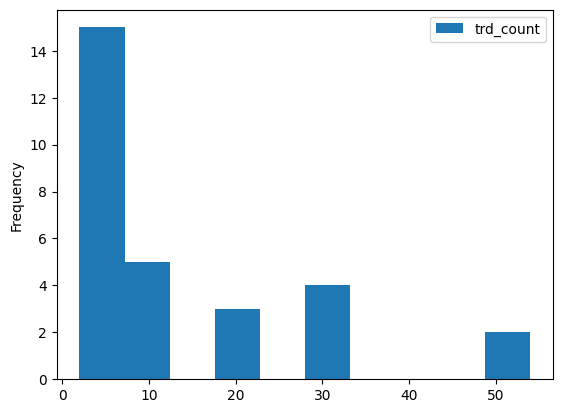

In [112]:

def per_day_datesorted_day(dataframe):
    day = []
    trade_counts_list = []
    
    
    vals = dataframe['Дата/время'].values
    
    for el in vals:
        numb = el[0:10]
        day.append(numb)
    
    days = list(set(day))
    
    for el in days:
        trd_count = len(dataframe[dataframe['Дата/время'].str.contains(el)])
        trade_counts_list.append(trd_count)
        
                
    per_day_df = pd.DataFrame({'date' : days,
                          'trd_count' : trade_counts_list
                         },
                           columns=['date','trd_count'])
    return per_day_df.sort_values(by='date', ascending=True)

a = per_day_datesorted_day(df_oct_2023)

a.plot.hist()

In [122]:
# Датасет по валютной паре 
def df_curr_pair(dataframe, current_pair):
    current = str(current_pair.upper())
    return dataframe.loc[(dataframe['Валютная пара'] == current)]

# список всех валютных пар 
def all_pairs_list(dataframe):
    return dataframe['Валютная пара'].unique().tolist()

def time_period_1(dataframe):
    all_dates = dataframe['Дата/время'].tolist()
    start = all_dates[-1]
    end = all_dates[0]
    start_dtm = datetime.datetime.strptime(start, '%d.%m.%Y %H:%M')
    end_dtm = datetime.datetime.strptime(end, '%d.%m.%Y %H:%M')
    return start_dtm, end_dtm

def max_pair_info(dataframe):
    
    pair_list = all_pairs_list(dataframe)
    
    dataframe_pairs_list = []
    for el in pair_list:
        dataframe_pairs_list.append(df_curr_pair(dataframe, el))
        
    pair_list = all_pairs_list(dataframe)
    trade_counts_list = []
    buy_count_list = []
    sell_count_list = []
    all_cur_value = []
    buy_cur_value = []
    sell_cur_value = []
    delta_cur_value = []
    min_price = []
    max_price = []
    x_max_min = []
    value = []
    buy_value = []
    sell_value = []
    delta_value = []
    first_date = []
    last_date = []
    delta_date = []



    for el in dataframe_pairs_list:
        trade_counts_list.append(len(el))
        all_cur_value.append(el['Количество'].sum())
        value.append(el['Сумма'].sum())
        
        a = el['Тип'].value_counts()
    
        if len(a) == 2:
            buy_count_list.append(a[0])
            sell_count_list.append(a[1])  
            buy_cur_value.append(el[el['Тип'] == 'buy']['Количество'].sum())
            sell_cur_value.append(el[el['Тип'] == 'sell']['Количество'].sum())
            delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
            min_price.append(el[el['Тип'] == 'buy']['Цена'].min())
            max_price.append(el[el['Тип'] == 'sell']['Цена'].max())
            x_max_min.append(el[el['Тип'] == 'sell']['Цена'].max()/el[el['Тип'] == 'buy']['Цена'].min())
            buy_value.append(el[el['Тип'] == 'buy']['Сумма'].sum())
            sell_value.append(el[el['Тип'] == 'sell']['Сумма'].sum())
            delta_value.append(el[el['Тип'] == 'sell']['Сумма'].sum() - el[el['Тип'] == 'buy']['Сумма'].sum())
            first_date.append(time_period_1(el)[0])
            last_date.append(time_period_1(el)[1])
            delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
        
        else:
            if str(el['Тип']) == 'buy':
                buy_count_list.append(len(el))
                sell_count_list.append(0)
                buy_cur_value.append(el['Количество'].sum())
                sell_cur_value.append(0)
                delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
                min_price.append(el['Цена'].min())
                max_price.append(el['Цена'].max())
                x_max_min.append(el['Цена'].max()/el['Цена'].min())
                buy_value.append(el['Сумма'].sum())
                sell_value.append(0)
                delta_value.append(0 - el['Сумма'].sum())
                first_date.append(time_period_1(el)[0])
                last_date.append(time_period_1(el)[1])
                delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
            else:
                buy_count_list.append(0)
                sell_count_list.append(len(el))
                buy_cur_value.append(0)
                sell_cur_value.append(el['Количество'].sum())
                delta_cur_value.append((el[el['Тип'] == 'sell']['Количество'].sum()) - (el[el['Тип'] == 'buy']['Количество'].sum()))
                min_price.append(el['Цена'].min())
                max_price.append(el['Цена'].max())
                x_max_min.append(el['Цена'].max()/el['Цена'].min())
                buy_value.append(0)
                sell_value.append(el['Сумма'].sum())
                delta_value.append(el['Сумма'].sum() - 0)
                first_date.append(time_period_1(el)[0])
                last_date.append(time_period_1(el)[1])
                delta_date.append(time_period_1(el)[1] - time_period_1(el)[0])
                
    finish_df = pd.DataFrame({'cur_pair' : pair_list,
                          'trd_count' : trade_counts_list,
                          'sell_count': sell_count_list,
                          'buy_count': buy_count_list,
                          'all_cur_value': all_cur_value,
                          'buy_cur_value': buy_cur_value,
                          'sell_cur_value': sell_cur_value,
                          'delta_cur_value': delta_cur_value,
                          'min_price': min_price,
                          'max_price': max_price,
                          'x_kf':x_max_min,
                          'value': value,
                          'buy_value': buy_value,
                          'sell_value': sell_value,
                          'delta_value': delta_value,
                          'first_date':  first_date, 
                          'last_date':  last_date,
                          'time_period': delta_date
                         },
                           columns=['cur_pair',
                                    'trd_count', 
                                    'sell_count', 
                                    'buy_count', 
                                    'all_cur_value', 
                                    'buy_cur_value', 
                                    'sell_cur_value',
                                    'delta_cur_value',
                                    'min_price', 
                                    'max_price', 
                                    'x_kf',
                                    'value',
                                    'buy_value', 
                                    'sell_value', 
                                    'delta_value',
                                    'first_date', 
                                    'last_date', 
                                    'time_period'])
    return finish_df
        

In [123]:
max_pair_info(df_oct_2023)

,cur_pair,trd_count,sell_count,buy_count,all_cur_value,buy_cur_value,sell_cur_value,delta_cur_value,min_price,max_price,x_kf,value,buy_value,sell_value,delta_value,first_date,last_date,time_period
0,EXM_ETH,93,44,49,19255.607528,9716.029779,9539.577749,-176.452030,4.100000e-06,4.900000e-06,1.195122,0.084819,0.042227,0.042592,0.000365,2023-10-01 06:07:00,2023-10-31 18:36:00,30 days 12:29:00
1,USDT_KZT,151,71,80,694.238668,349.563106,344.675562,-4.887545,4.350000e+02,4.990000e+02,1.147126,315132.078389,156379.849997,158752.228391,2372.378394,2023-10-02 12:41:00,2023-10-31 16:11:00,29 days 03:30:00
2,XRP_ETH,17,8,9,219.574866,96.441063,123.133803,26.692740,3.000000e-04,3.400000e-04,1.133333,0.069817,0.030099,0.039718,0.009619,2023-10-03 23:00:00,2023-10-31 15:03:00,27 days 16:03:00
3,EXM_BTC,33,16,17,39961.351008,22526.954556,17434.396452,-5092.558104,2.100000e-07,2.800000e-07,1.333333,0.009836,0.005467,0.004369,-0.001097,2023-10-01 00:57:00,2023-10-30 22:17:00,29 days 21:20:00
4,ROOBEE_USDT,3,1,2,16003.246667,4316.666667,11686.580000,7369.913333,6.000000e-04,7.000000e-04,1.166667,9.976198,2.590000,7.386198,4.796198,2023-10-22 09:58:00,2023-10-30 00:51:00,7 days 14:53:00
5,XLM_RUB,4,2,2,430.253161,220.120909,210.132252,-9.988657,1.000000e+01,1.200000e+01,1.200000,4743.476632,2321.460000,2422.016632,100.556632,2023-10-12 18:12:00,2023-10-28 15:12:00,15 days 21:00:00
6,TON_BTC,3,3,0,49.911595,0.000000,49.911595,-49.911595,6.000000e-05,7.000000e-05,1.166667,0.003284,0.000000,0.003284,0.003284,2023-10-07 06:49:00,2023-10-28 06:47:00,20 days 23:58:00
7,DOGE_BTC,10,4,6,695.939209,463.714048,232.225161,-231.488886,2.000000e-06,2.200000e-06,1.100000,0.001449,0.000955,0.000494,-0.000461,2023-10-04 23:42:00,2023-10-27 21:18:00,22 days 21:36:00
8,DAI_RUB,17,6,11,92.572028,63.660070,28.911958,-34.748113,8.900000e+01,1.000000e+02,1.123596,8528.658676,5783.948422,2744.710254,-3039.238168,2023-10-03 08:31:00,2023-10-27 08:08:00,23 days 23:37:00
9,EXM_USDT,42,14,28,33181.936098,16916.071872,16265.864226,-650.207646,7.200000e-03,9.300000e-03,1.291667,268.619019,126.813176,141.805843,14.992667,2023-10-16 20:25:00,2023-10-27 00:57:00,10 days 04:32:00


In [20]:
# Хочу визуализацию. График с оью у - время, а по оси х число сделок
df = per_day_datesorted(df_oct_2023)

In [34]:
df = per_day_datesorted(df_oct_2023)

import pandas as pd
import matplotlib.pyplot as plt


# Преобразование столбца 'Дата сделки' в тип данных datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Установка столбца 'Дата сделки' как индекс
df.set_index('date', inplace=True)

# Визуализация
plt.figure(figsize=(10, 10))

plt.plot(df['date'], df['trd_count'], marker='o')
plt.title('График числа сделок в день')
plt.xlabel('trd_count')
plt.ylabel('date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

KeyError: 'date'

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='date'>

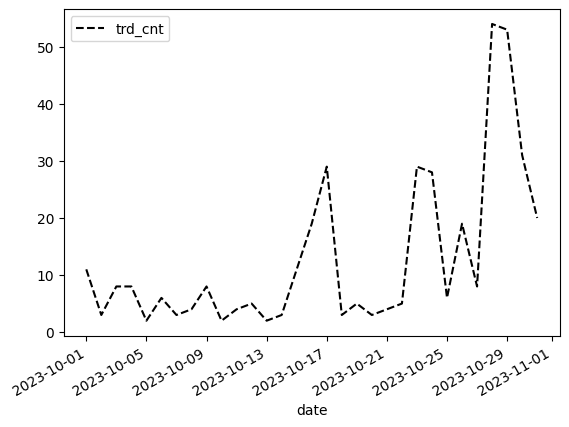

In [22]:
def trd_count_to_month_visual(df)

    # Преобразование столбца 'Дата сделки' в тип данных datetime
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
    df.set_index('date', inplace=True)
    return df.plot(x='date',y='trd_cnt',style='k--')

<Axes: xlabel='date'>

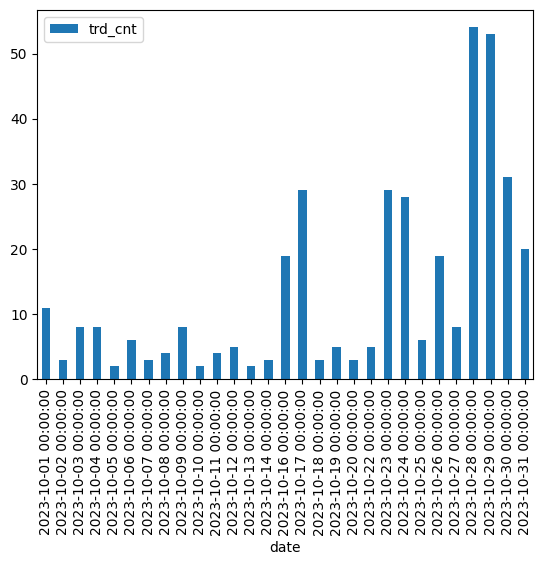

In [32]:
df.set_index('date', inplace=True)
df.plot(y='trd_cnt', kind='bar')